In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.text import *


/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: nump

In [3]:
import html

In [4]:
article_PATH = Path('data/News')
summary_PATH = Path('data/Summaries')
PATH = Path('data')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)

In [5]:
CLASSES = ['business', 'entertainments', 'politics','sport','tech']

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            texts.append(fname.open('r' , encoding='ibm866').read())
            labels.append(idx)
    return np.array(texts),np.array(labels)

In [6]:
art_texts,art_labels = get_texts(article_PATH)
sum_texts,sum_labels = get_texts(summary_PATH)

In [7]:
len(art_texts), len(sum_texts)

(1839, 1839)

In [8]:
art_texts = list(art_texts)
sum_texts = list(sum_texts)

In [9]:
art_tok = Tokenizer.proc_all_mp(partition_by_cores(art_texts))

/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retur

In [10]:
sum_tok = Tokenizer.proc_all_mp(partition_by_cores(sum_texts))

/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retur

In [11]:
art_tok[0] , sum_tok[0]

(['soros',
  'group',
  'warns',
  'of',
  'kazakh',
  'close',
  '\n\n',
  'the',
  'open',
  'society',
  'institute',
  '(',
  't_up',
  'osi',
  ')',
  ',',
  'financed',
  'by',
  'billionaire',
  'george',
  'soros',
  ',',
  'has',
  'accused',
  'kazakhstan',
  'officials',
  'of',
  'trying',
  'to',
  'close',
  'down',
  'its',
  'local',
  'office',
  '.',
  '\n\n',
  'a',
  'demand',
  'for',
  'unpaid',
  'taxes',
  'and',
  'fines',
  'of',
  '$',
  '600,000',
  '(',
  '┬',
  'г425,000',
  ')',
  'is',
  'politically',
  'motivated',
  ',',
  'the',
  't_up',
  'osi',
  'claimed',
  ',',
  'adding',
  'that',
  'it',
  'paid',
  'the',
  'money',
  'in',
  'october',
  '.',
  'the',
  'organisation',
  'has',
  'found',
  'itself',
  'in',
  'trouble',
  'after',
  'being',
  'accused',
  'of',
  'helping',
  'to',
  'topple',
  'georgia',
  "'s",
  'former',
  'president',
  '.',
  'it',
  'denies',
  'having',
  'any',
  'role',
  ',',
  'but',
  'offices',
  'have',
 

In [12]:
pickle.dump(art_tok, (PATH/'art_tok.pkl').open('wb'))
pickle.dump(sum_tok, (PATH/'sum_tok.pkl').open('wb'))

In [13]:
freq = Counter(p for o in art_tok for p in o)
freq.most_common(25)

[('the', 44365),
 ('.', 34668),
 (',', 29521),
 ('to', 22210),
 ('"', 17751),
 ('of', 17034),
 ('and', 15590),
 ('a', 15544),
 ('in', 14917),
 ('-', 10414),
 ('\n\n', 8724),
 ('is', 7527),
 ('that', 7470),
 ('for', 7402),
 ("'s", 7069),
 ('it', 6796),
 ('on', 6449),
 ('said', 6429),
 ('be', 5126),
 ('he', 5112),
 ('was', 4941),
 ('with', 4408),
 ('has', 4281),
 ('as', 4276),
 ('have', 4242)]

In [14]:
def toks2ids(tok,pre):
    freq = Counter(p for o in tok for p in o)
    itos = [o for o,c in freq.most_common(50000)]
    itos.insert(0, '_bos_')
    itos.insert(1, '_pad_')
    itos.insert(2, '_eos_')
    itos.insert(3, '_unk')
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([stoi[o] for o in p] + [2]) for p in tok])
    np.save(TMP_PATH/f'{pre}_ids.npy', ids)
    pickle.dump(itos, open(TMP_PATH/f'{pre}_itos.pkl', 'wb'))
    return ids,itos,stoi

In [15]:
sum_ids,sum_itos,sum_stoi = toks2ids(sum_tok,'sum')
art_ids,art_itos,art_stoi = toks2ids(art_tok,'art')

In [16]:
def load_ids(pre):
    ids = np.load(TMP_PATH/f'{pre}_ids.npy')
    itos = pickle.load(open(TMP_PATH/f'{pre}_itos.pkl', 'rb'))
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    return ids,itos,stoi

In [17]:
sum_ids,sum_itos,sum_stoi = load_ids('sum')
art_ids,art_itos,art_stoi = load_ids('art')

In [18]:
[art_itos[o] for o in art_ids[1]], len(sum_itos), len(art_itos)

(['eu',
  'to',
  'probe',
  'alitalia',
  "'",
  'state',
  'aid',
  "'",
  '\n\n',
  'the',
  'european',
  'commission',
  'has',
  'officially',
  'launched',
  'an',
  'in',
  '-',
  'depth',
  'investigation',
  'into',
  'whether',
  'italian',
  'airline',
  'alitalia',
  'is',
  'receiving',
  'illegal',
  'state',
  'aid',
  '.',
  '\n\n',
  'commission',
  'officials',
  'are',
  'to',
  'look',
  'at',
  'rome',
  "'s",
  'provision',
  'of',
  'a',
  '400',
  'm',
  'euro',
  '(',
  '$',
  '495',
  'm',
  ';',
  '┬',
  'г275',
  'm',
  ')',
  'loan',
  'to',
  'the',
  'carrier',
  '.',
  'both',
  'the',
  'italian',
  'government',
  'and',
  'alitalia',
  'have',
  'repeatedly',
  'denied',
  'that',
  'the',
  'money',
  '-',
  'part',
  'of',
  'a',
  'vital',
  'restructuring',
  'plan',
  '-',
  'is',
  'state',
  'aid',
  '.',
  'the',
  'investigation',
  'could',
  'take',
  'up',
  'to',
  '18',
  'months',
  '.',
  'however',
  ',',
  'transport',
  'commission

In [19]:
import fastText as ft


In [20]:
# en_vecs = ft.load_model(str((PATH/'wiki.en.bin')))

In [21]:
# def get_vecs(lang, ft_vecs):
#     vecd = {w:ft_vecs.get_word_vector(w) for w in ft_vecs.get_words()}
#     pickle.dump(vecd, open(PATH/f'wiki.{lang}.pkl','wb'))
#     return vecd

In [22]:
# en_vecd = get_vecs('en', en_vecs)

In [23]:
en_vecd = pickle.load(open(PATH/'wiki.en.pkl','rb'))


In [24]:
dim_en_vec = len(en_vecd[','])
dim_en_vec

300

In [25]:
# en_vecs = np.stack(list(en_vecd.values()))
# en_vecs.mean(),en_vecs.std()

# ModelData

In [26]:
sumlen_90 = int(np.percentile([len(o) for o in sum_ids], 80))
artlen_90 = int(np.percentile([len(o) for o in art_ids], 80))
sumlen_90,artlen_90

(252, 610)

In [27]:
sum_ids_tr = np.array([o[:sumlen_90] for o in sum_ids])
art_ids_tr = np.array([o[:artlen_90] for o in art_ids])

In [28]:
class Seq2SeqDataset(Dataset):
    def __init__(self, x, y): self.x,self.y = x,y
    def __getitem__(self, idx): return A(self.x[idx], self.y[idx])
    def __len__(self): return len(self.x)

In [29]:
np.random.seed(42)
trn_keep = np.random.rand(len(sum_ids_tr))>0.1
sum_trn,art_trn = sum_ids_tr[trn_keep],art_ids_tr[trn_keep]
sum_val,art_val = sum_ids_tr[~trn_keep],art_ids_tr[~trn_keep]
len(sum_trn),len(sum_val)

(1639, 200)

In [30]:
trn_ds = Seq2SeqDataset(art_trn,sum_trn)
val_ds = Seq2SeqDataset(art_val,sum_val)

In [31]:
bs = 4

In [32]:
trn_samp = SortishSampler(sum_trn, key=lambda x: len(sum_trn[x]), bs=bs)
val_samp = SortSampler(sum_val, key=lambda x: len(sum_val[x]))

In [33]:
trn_dl = DataLoader(trn_ds, bs, transpose=True, transpose_y=True, num_workers=1, 
                    pad_idx=1, pre_pad=False, sampler=trn_samp)
val_dl = DataLoader(val_ds, int(bs*1.6), transpose=True, transpose_y=True, num_workers=1, 
                    pad_idx=1, pre_pad=False, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [34]:
it = iter(trn_dl)
its = [next(it) for i in range(5)]
[(len(x),len(y)) for x,y in its]

[(610, 252), (338, 129), (610, 252), (365, 129), (266, 100)]

In [55]:
def create_emb(itos, em_sz):
    emb = nn.Embedding(len(itos), em_sz, padding_idx=1)
    wgts = emb.weight.data
#     miss = []
#     for i,w in enumerate(itos):
#         try: wgts[i] = torch.from_numpy(vecs[w]*3)
#         except: miss.append(w)
#     print(len(miss),miss[5:10])
    return emb

In [56]:
nh,nl = 1150,3


In [57]:
class Seq2SeqStepper(Stepper):
    def step(self, xs, y, epoch):
        self.m.pr_force = (10-epoch)*0.1 if epoch<10 else 0
        xtra = []
        output = self.m(*xs, y)
        if isinstance(output,tuple): output,*xtra = output
        self.opt.zero_grad()
        loss = raw_loss = self.crit(output, y)
        if self.reg_fn: loss = self.reg_fn(output, xtra, raw_loss)
        loss.backward()
        if self.clip:   # Gradient clipping
            nn.utils.clip_grad_norm(trainable_params_(self.m), self.clip)
        self.opt.step()
        return raw_loss.data[0]

In [58]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[0])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [59]:
class Seq2SeqRNN_All(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=False)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.25)
        self.emb_dec = create_emb(itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data

        self.W1 = rand_p(nh, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh, em_sz_dec)
        self.V = rand_p(em_sz_dec)

    def forward(self, inp, y=None , ret_attn=False):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))

        dec_inp = V(torch.zeros(bs).long())
        res,attns = [],[]
        w1e = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(w1e + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]
        res = torch.stack(res)
        if ret_attn: res = res,torch.stack(attns)
        return res

    def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))

In [60]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
def seq2seq_loss(input, target):
    sl,bs = target.size()
    sl_in,bs_in,nc = input.size()
    if sl>sl_in: input = F.pad(input, (0,0,0,0,0,sl-sl_in))
    input = input[:sl]
    return F.cross_entropy(input.view(-1,nc), target.view(-1))

In [61]:
rnn = Seq2SeqRNN_All(en_vecd, art_itos,400, en_vecd, sum_itos,400, nh, sumlen_90)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

In [47]:
# ! wget -nH -r -np -P {PATH} http://files.fast.ai/models/wt103/

--2018-08-26 19:58:01--  http://files.fast.ai/models/wt103/
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/models/wt103/index.html’

models/wt103/index. 100%[===================>]     857  --.-KB/s    in 0s      

2018-08-26 19:58:02 (80.0 MB/s) - ‘data/models/wt103/index.html’ saved [857/857]

Loading robots.txt; please ignore errors.
--2018-08-26 19:58:02--  http://files.fast.ai/robots.txt
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 404 Not Found
2018-08-26 19:58:02 ERROR 404: Not Found.

--2018-08-26 19:58:02--  http://files.fast.ai/models/wt103/?C=N;O=D
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/models/wt103/index.html?C=N;O=D’

models/wt103/index. 100%[===================>]

In [48]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [49]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

mean of first layer weights

In [50]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [51]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [53]:
new_w = np.zeros((len(art_itos), 400), dtype=np.float32)
for i,w in enumerate(art_itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m


In [54]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

In [62]:
learn.model.load_state_dict(wgts)

KeyError: 'unexpected key "0.encoder.weight" in state_dict'

 62%|██████▏   | 256/410 [04:26<02:40,  1.04s/it, loss=32.3]

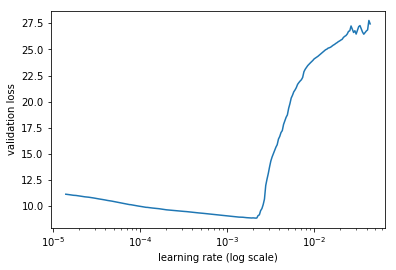

In [42]:
learn.lr_find()
learn.sched.plot()

In [42]:
lr= 6e-4
wd = 1e-7

In [43]:
learn.fit(lr, 1, wds=wd, use_clr=(20,10), cycle_len=30, stepper = Seq2SeqStepper)

epoch      trn_loss   val_loss                              
    0      8.033596   8.26035   
    1      6.39578    7.559353                              
    2      5.838573   7.643671                              
    3      5.92883    7.56033                               
    4      5.680382   7.147855                              
    5      5.642039   7.03784                               
    6      5.793968   6.920664                              
    7      5.936537   7.582027                              
 53%|█████▎    | 217/410 [03:45<03:20,  1.04s/it, loss=6.5] 

KeyboardInterrupt: 

In [56]:
import time
learn.save('sum')

In [46]:
learn.load('sum')

RuntimeError: While copying the parameter named W1, whose dimensions in the model are torch.Size([800, 300]) and whose dimensions in the checkpoint are torch.Size([500, 300]).

# test

In [44]:
x,y = next(iter(val_dl))
probs,attns = learn.model(V(x),ret_attn=True)
preds = to_np(probs.max(2)[1])

In [45]:
attn = to_np(attns[...,5])

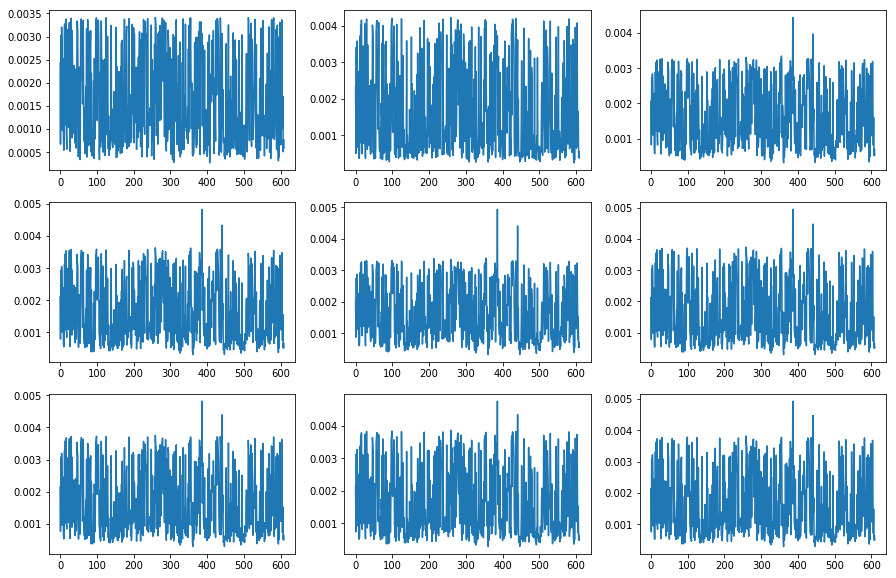

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i,ax in enumerate(axes.flat):
    ax.plot(attn[i])

In [51]:
for i in range(1):
    print('article :')
    print(' '.join([art_itos[o] for o in x[:,i] if o != 1]))
    print('summary :')
    print(' '.join([sum_itos[o] for o in y[:,i] if o != 1]))
    print('predicted summary :')
    print(' '.join([sum_itos[o] for o in preds[:,i] if o!=1]))
    

article :
uk interest rates held at 4.75 % 

 the bank of england has left interest rates on hold again at 4.75 % , in a widely - predicted move . 

 rates went up five times from november 2003 - as the bank sought to cool the housing market and consumer debt - but have remained unchanged since august . recent data has indicated a slowdown in manufacturing and consumer spending , as well as in mortgage approvals . and retail sales disappointed over christmas , with analysts putting the drop down to less consumer confidence . 

 rising interest rates and the accompanying slowdown in the housing market have knocked consumers ' optimism , causing a sharp fall in demand for expensive goods , according to a report earlier this week from the british retail consortium . the t_up brc said britain 's retailers had endured their worst christmas in a decade . 

 " today 's no change decision is correct , " said david frost , director general of the british chambers of commerce ( t_up bcc ) . " bu

In [64]:
m = learn.model
m.eval()

Seq2SeqRNN_All(
  (emb_enc): Embedding(27200, 400, padding_idx=1)
  (gru_enc): GRU(400, 1150, num_layers=2, dropout=0.25)
  (out_enc): Linear(in_features=1150, out_features=400, bias=False)
  (drop_enc): Dropout(p=0.25)
  (emb_dec): Embedding(28378, 400, padding_idx=1)
  (gru_dec): GRU(400, 400, num_layers=2, dropout=0.1)
  (emb_enc_drop): Dropout(p=0.15)
  (out_drop): Dropout(p=0.35)
  (out): Linear(in_features=400, out_features=28378, bias=True)
  (l2): Linear(in_features=400, out_features=400, bias=True)
  (l3): Linear(in_features=1550, out_features=400, bias=True)
)